Add the (5.2n) shortest edges
- Will this create a connected graph?

In [190]:
import math
import random 
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [191]:
n = 40 # number of nodes I want in graph
rand_seed = 13 # 13, 47, 50

In [192]:
random.seed(rand_seed) # Must be in the same code chunk as when I am doing the randomness

G = nx.Graph()
x_axis = {}
y_axis = {}
for i in range(0, n):
    x_axis[i] = round(random.random(), 3)
    y_axis[i] = round(random.random(), 3)
    G.add_node(i)

nx.set_node_attributes(G, x_axis, name='x_axis')
nx.set_node_attributes(G, y_axis, name='y_axis')

In [193]:
G.nodes().data()

NodeDataView({0: {'x_axis': 0.259, 'y_axis': 0.685}, 1: {'x_axis': 0.684, 'y_axis': 0.849}, 2: {'x_axis': 0.186, 'y_axis': 0.231}, 3: {'x_axis': 0.147, 'y_axis': 0.225}, 4: {'x_axis': 0.734, 'y_axis': 0.13}, 5: {'x_axis': 0.531, 'y_axis': 0.214}, 6: {'x_axis': 0.295, 'y_axis': 0.432}, 7: {'x_axis': 0.838, 'y_axis': 0.608}, 8: {'x_axis': 0.014, 'y_axis': 0.276}, 9: {'x_axis': 0.147, 'y_axis': 0.871}, 10: {'x_axis': 0.81, 'y_axis': 0.806}, 11: {'x_axis': 0.826, 'y_axis': 0.745}, 12: {'x_axis': 0.949, 'y_axis': 0.794}, 13: {'x_axis': 0.257, 'y_axis': 0.85}, 14: {'x_axis': 0.487, 'y_axis': 0.755}, 15: {'x_axis': 0.564, 'y_axis': 0.43}, 16: {'x_axis': 0.364, 'y_axis': 0.43}, 17: {'x_axis': 0.314, 'y_axis': 0.117}, 18: {'x_axis': 0.82, 'y_axis': 0.798}, 19: {'x_axis': 0.986, 'y_axis': 0.691}, 20: {'x_axis': 0.554, 'y_axis': 0.748}, 21: {'x_axis': 0.135, 'y_axis': 0.677}, 22: {'x_axis': 0.443, 'y_axis': 0.177}, 23: {'x_axis': 0.203, 'y_axis': 0.523}, 24: {'x_axis': 0.253, 'y_axis': 0.459}, 25

In [194]:
G.nodes()[0]['x_axis']

0.259

In [195]:
# Create a dictionary of all distances between points

dist_df = pd.DataFrame(columns = ['node1', 'node2', 'distance'])

for i in range(0, 20): # Go from 0 to n-1
    for j in range(i+1, 20): # Go from i+1 to n-1
        u = (G.nodes()[i]['x_axis'], G.nodes()[i]['y_axis'])
        v = (G.nodes()[j]['x_axis'], G.nodes()[j]['y_axis'])

        # Find distance between points
        distance = math.dist(u, v)

        # Add it to the dataframe
        dist_df.loc[len(dist_df)] = [i, j, distance]

In [196]:
# Add the (5.2n) shortest edges
edges = int(5.2 * n)
dist_sorted = dist_df.sort_values("distance").head(edges)

for index, row in dist_sorted.iterrows():
    i = row['node1']
    j = row['node2']
    G.add_edge(i, j)

In [197]:
# Calculate average degree

def avg_degree(G): # Calculation taken from Prof Cannon's research
    # Function calculate average degree from graph (added by Joy)
    return 2 * G.number_of_edges() / G.number_of_nodes()

avg_degree(G)

9.5

In [198]:
# Create a dictionary of node positions
node_locations = {v: (float(G.nodes()[v]['x_axis']), float(G.nodes()[v]['y_axis'])) for v in G.nodes()}

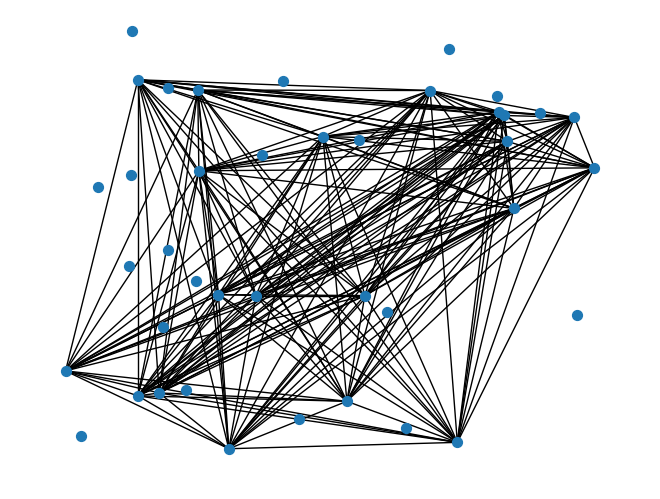

In [199]:
# Drawing a figure with these locations
nx.draw(G, node_size = 50, pos = node_locations)
plt.savefig(f'imgs/model_two/{n}-{rand_seed}.png')